𝗧𝗮𝘀𝗸: Write a solution to report the customer ids from the Customer df that bought all the products in the Product df.

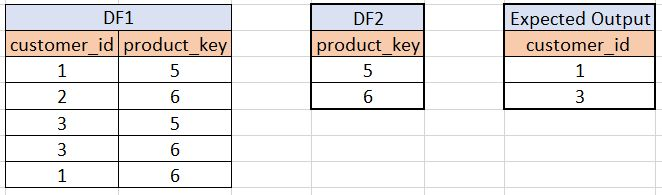

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('challenges').getOrCreate()

In [2]:
data1 = [ (1,5), (2,6), (3,5), (3,6), (1,6) ]
schema1 = ["customer_id","product_key"]

data2 = [ (5,), (6,) ]
schema2 = ["product_key"]

cust_df = spark.createDataFrame(data1,schema1)
cust_df.show()

product_df = spark.createDataFrame(data2,schema2)
product_df.show()

+-----------+-----------+
|customer_id|product_key|
+-----------+-----------+
|          1|          5|
|          2|          6|
|          3|          5|
|          3|          6|
|          1|          6|
+-----------+-----------+

+-----------+
|product_key|
+-----------+
|          5|
|          6|
+-----------+



In [11]:
from pyspark.sql.functions import *

df_customers_products = cust_df.groupBy("customer_id")\
 .agg(countDistinct("product_key").alias("distinct_product_cnt"))

df_customers_products.show()

+-----------+--------------------+
|customer_id|distinct_product_cnt|
+-----------+--------------------+
|          1|                   2|
|          3|                   2|
|          2|                   1|
+-----------+--------------------+



In [12]:
df_result = df_customers_products\
 .filter(col("distinct_product_cnt") == product_df.count()) \
 .select("customer_id")

df_result.show()

+-----------+
|customer_id|
+-----------+
|          1|
|          3|
+-----------+

